In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Macosko

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,annotation,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,full_name,organ,organism,platform
p1_AAAAAAACAGTC,exact,Muller cell,CL:0011107,muller,34.0,Macosko,-2147483648,Retina,Mus musculus,Drop-seq
p1_AAAAAAATGGTA,exact,retinal rod cell,CL:0000604,rods,24.0,Macosko,-2147483648,Retina,Mus musculus,Drop-seq
p1_AAAAACTCTTAG,exact,retinal bipolar neuron,CL:0000103,bipolar,26.0,Macosko,-2147483648,Retina,Mus musculus,Drop-seq
p1_AAAAAGTCGGCT,exact,amacrine cell,CL:0000561,amacrine,12.0,Macosko,-2147483648,Retina,Mus musculus,Drop-seq
p1_AAAAATTTGTTC,exact,retinal rod cell,CL:0000604,rods,24.0,Macosko,-2147483648,Retina,Mus musculus,Drop-seq


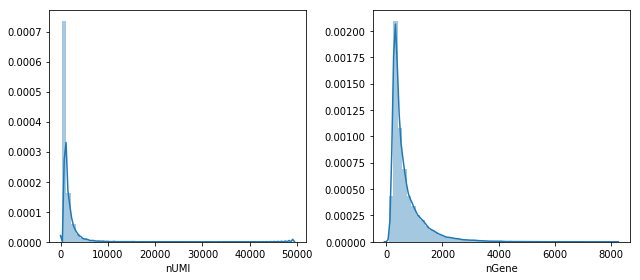

In [2]:
macosko = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Macosko/data.h5")
utils.peek(macosko, "Macosko")
macosko = macosko.normalize()
macosko.obs.head()

In [3]:
macosko_model = cb.directi.fit_DIRECTi(
    macosko, macosko.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Macosko/model_0"
)
macosko.latent = macosko_model.inference(macosko)

[DIRECTi epoch 0] train=1.354, val=0.551, time elapsed=4.4s Best save...
[DIRECTi epoch 1] train=0.514, val=0.511, time elapsed=3.4s Best save...
[DIRECTi epoch 2] train=0.499, val=0.494, time elapsed=3.4s Best save...
[DIRECTi epoch 3] train=0.491, val=0.488, time elapsed=3.4s Best save...
[DIRECTi epoch 4] train=0.486, val=0.485, time elapsed=3.4s Best save...
[DIRECTi epoch 5] train=0.483, val=0.485, time elapsed=3.4s Best save...
[DIRECTi epoch 6] train=0.481, val=0.481, time elapsed=3.8s Best save...
[DIRECTi epoch 7] train=0.478, val=0.477, time elapsed=3.8s Best save...
[DIRECTi epoch 8] train=0.476, val=0.476, time elapsed=3.8s Best save...
[DIRECTi epoch 9] train=0.475, val=0.476, time elapsed=3.8s Best save...
[DIRECTi epoch 10] train=0.475, val=0.475, time elapsed=3.8s Best save...
[DIRECTi epoch 11] train=0.474, val=0.475, time elapsed=3.8s Best save...
[DIRECTi epoch 12] train=0.473, val=0.474, time elapsed=3.6s Best save...
[DIRECTi epoch 13] train=0.473, val=0.473, time 

[  Info   ] Computing tSNE...


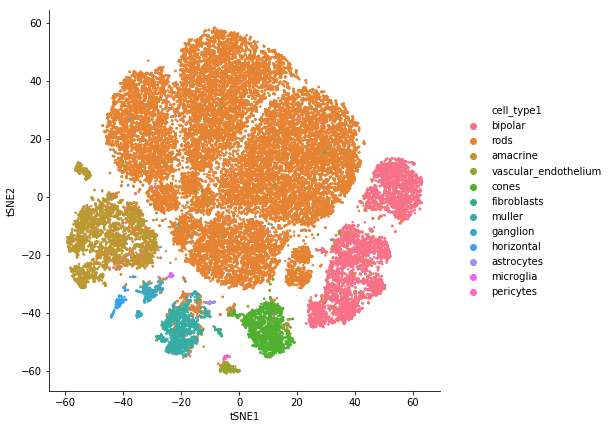

In [4]:
plot = macosko.visualize_latent("cell_type1")
plot.get_figure().savefig("Macosko/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


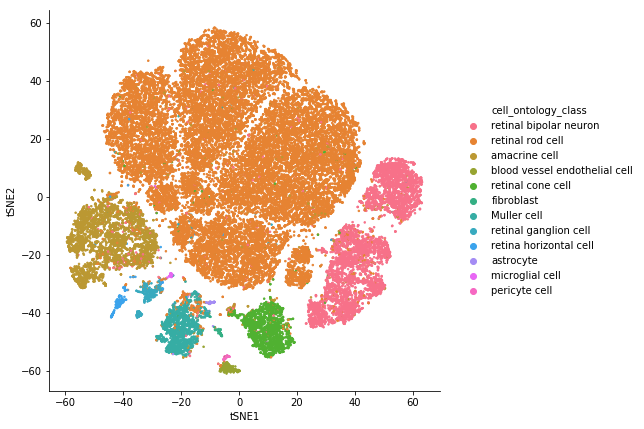

In [5]:
plot = macosko.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Macosko/cell_ontology_class.pdf", bbox_inches="tight")

In [6]:
%%capture capio
macosko_models = [macosko_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    macosko_models.append(cb.directi.fit_DIRECTi(
        macosko, macosko.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Macosko/model_%d" % i
    ))
macosko_blast = cb.blast.BLAST(macosko_models, macosko, keep_exprs=True).build_empirical()
macosko_blast.save("Macosko")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Macosko/model_1/checkpoint-72
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Macosko/model_2/checkpoint-188
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Macosko/model_3/checkpoint-120


In [7]:
with open("Macosko/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Macosko/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(macosko_blast, "Macosko")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9648
Accuracy = 0.9814


### Shekhar

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,annotation,batch,cell_ontology_class,cell_ontology_id,cell_type1,cell_type2,cluster,dataset_name,full_name,organ,organism,platform,replicate
Bipolar1_CCCACAAGACTA,exact,batch1,retinal bipolar neuron,CL:0000103,bipolar,BC5D,11.0,Shekhar,-2147483648,Retina,Mus musculus,Drop-seq,Bipolar1
Bipolar1_CAAAGCATTTGC,exact,batch1,retinal bipolar neuron,CL:0000103,bipolar,BC6,5.0,Shekhar,-2147483648,Retina,Mus musculus,Drop-seq,Bipolar1
Bipolar1_CTTTTGATTGAC,exact,batch1,retinal bipolar neuron,CL:0000103,bipolar,BC7 (Cone Bipolar cell 7),4.0,Shekhar,-2147483648,Retina,Mus musculus,Drop-seq,Bipolar1
Bipolar1_GCTCCAATGACA,exact,batch1,retinal bipolar neuron,CL:0000103,bipolar,RBC (Rod Bipolar cell),1.0,Shekhar,-2147483648,Retina,Mus musculus,Drop-seq,Bipolar1
Bipolar1_AAATACCCTCAT,exact,batch1,retinal bipolar neuron,CL:0000103,bipolar,BC5A (Cone Bipolar cell 5A),3.0,Shekhar,-2147483648,Retina,Mus musculus,Drop-seq,Bipolar1


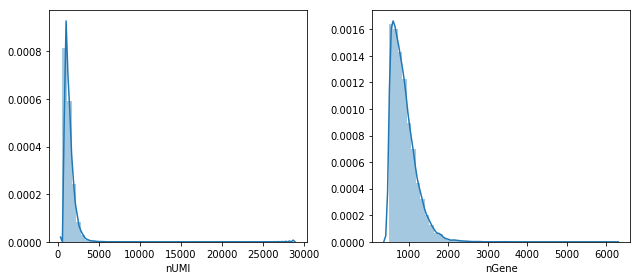

In [9]:
shekhar = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Shekhar/data.h5")
utils.peek(shekhar, "Shekhar")
shekhar = shekhar.normalize()
shekhar.obs.head()

In [10]:
opt_model_kwargs = dict(batch_effect="batch")
shekhar_model = cb.directi.fit_DIRECTi(
    shekhar, shekhar.uns["seurat_genes"],
    **fixed_model_kwargs,  **opt_model_kwargs,
    path="/tmp/cb/db/Shekhar/model_0"
)
shekhar.latent = shekhar_model.inference(shekhar)

[DIRECTi epoch 0] train=1.485, val=0.643, time elapsed=3.3s Regular save...
[DIRECTi epoch 1] train=0.479, val=0.479, time elapsed=2.6s
[DIRECTi epoch 2] train=0.449, val=0.452, time elapsed=2.6s
[DIRECTi epoch 3] train=0.444, val=0.450, time elapsed=2.5s
[DIRECTi epoch 4] train=0.442, val=0.446, time elapsed=2.5s
[DIRECTi epoch 5] train=0.441, val=0.442, time elapsed=2.5s
[DIRECTi epoch 6] train=0.438, val=0.439, time elapsed=2.5s
[DIRECTi epoch 7] train=0.435, val=0.439, time elapsed=2.5s
[DIRECTi epoch 8] train=0.433, val=0.436, time elapsed=2.5s
[DIRECTi epoch 9] train=0.431, val=0.434, time elapsed=2.6s
[DIRECTi epoch 10] train=0.429, val=0.431, time elapsed=2.5s Regular save...
[DIRECTi epoch 11] train=0.428, val=0.430, time elapsed=2.5s
[DIRECTi epoch 12] train=0.426, val=0.429, time elapsed=2.5s
[DIRECTi epoch 13] train=0.425, val=0.428, time elapsed=2.6s
[DIRECTi epoch 14] train=0.424, val=0.427, time elapsed=2.5s
[DIRECTi epoch 15] train=0.424, val=0.428, time elapsed=2.5s
[D

[  Info   ] Computing tSNE...


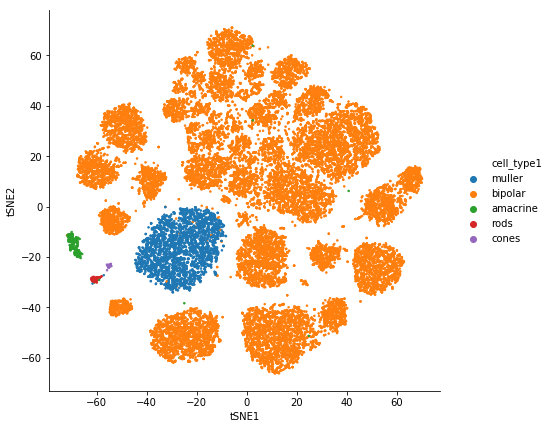

In [11]:
plot = shekhar.visualize_latent("cell_type1")
plot.get_figure().savefig("Shekhar/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


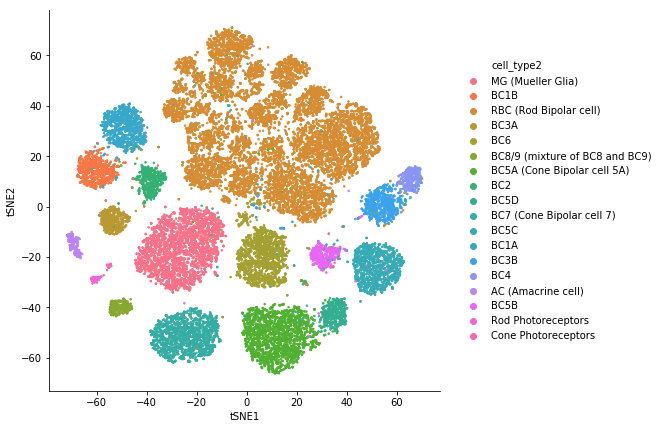

In [12]:
plot = shekhar.visualize_latent("cell_type2")
plot.get_figure().savefig("Shekhar/cell_type2.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


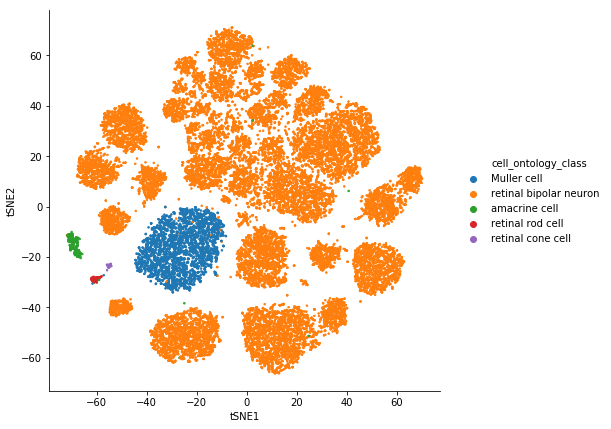

In [13]:
plot = shekhar.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Shekhar/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


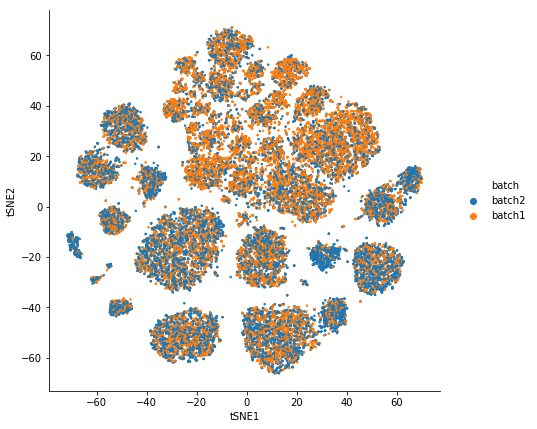

In [14]:
plot = shekhar.visualize_latent("batch")
plot.get_figure().savefig("Shekhar/batch.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


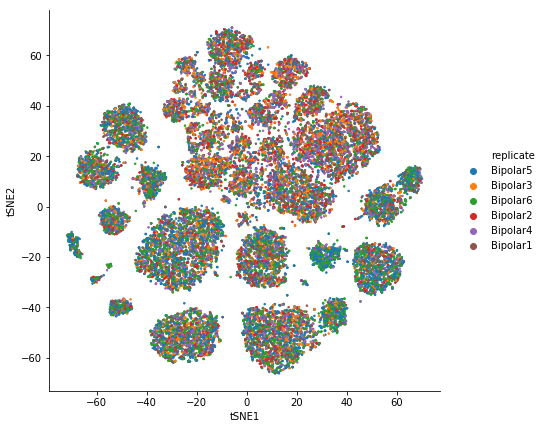

In [15]:
plot = shekhar.visualize_latent("replicate")
plot.get_figure().savefig("Shekhar/replicate.pdf", bbox_inches="tight")

In [16]:
%%capture capio
shekhar_models = [shekhar_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    shekhar_models.append(cb.directi.fit_DIRECTi(
        shekhar, shekhar.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Shekhar/model_%d" % i
    ))
shekhar_blast = cb.blast.BLAST(shekhar_models, shekhar, keep_exprs=True).build_empirical()
shekhar_blast.save("Shekhar")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Shekhar/model_1/checkpoint-59
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Shekhar/model_2/checkpoint-86
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Shekhar/model_3/checkpoint-74


In [17]:
with open("Shekhar/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Shekhar/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [18]:
utils.self_projection(shekhar_blast, "Shekhar")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9871
Accuracy = 0.9998


### Mouse aligned

In [19]:
if not os.path.exists("ALIGNED_Mus_musculus_Retina"):
    os.makedirs("ALIGNED_Mus_musculus_Retina")
shekhar.obs["shekhar_batch"] = shekhar.obs["batch"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    macosko=macosko, shekhar=shekhar
), merge_uns_slots=["seurat_genes"])

[ Warning ] 833 out of 24121 variables are not found, will be set to zero!
[ Warning ] 10955 out of 24121 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [20]:
opt_model_kwargs=dict(
    batch_effect=["dataset_name", "shekhar_batch"],
    rmbatch_module_kwargs=[dict(lambda_reg=0.001), dict(lambda_reg=0.005)]
)
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Retina/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=0.875, val=0.448, time elapsed=9.7s Regular save...
[DIRECTi epoch 1] train=0.436, val=0.431, time elapsed=8.7s
[DIRECTi epoch 2] train=0.428, val=0.426, time elapsed=8.8s
[DIRECTi epoch 3] train=0.424, val=0.424, time elapsed=8.8s
[DIRECTi epoch 4] train=0.420, val=0.419, time elapsed=8.8s
[DIRECTi epoch 5] train=0.418, val=0.417, time elapsed=8.8s
[DIRECTi epoch 6] train=0.416, val=0.416, time elapsed=8.8s
[DIRECTi epoch 7] train=0.415, val=0.415, time elapsed=8.5s
[DIRECTi epoch 8] train=0.415, val=0.415, time elapsed=8.3s
[DIRECTi epoch 9] train=0.414, val=0.414, time elapsed=8.7s
[DIRECTi epoch 10] train=0.414, val=0.414, time elapsed=8.7s Regular save...
[DIRECTi epoch 11] train=0.413, val=0.414, time elapsed=8.8s
[DIRECTi epoch 12] train=0.413, val=0.413, time elapsed=8.7s
[DIRECTi epoch 13] train=0.413, val=0.413, time elapsed=8.7s
[DIRECTi epoch 14] train=0.413, val=0.413, time elapsed=8.7s
[DIRECTi epoch 15] train=0.412, val=0.413, time elapsed=8.8s
[D

[  Info   ] Computing tSNE...


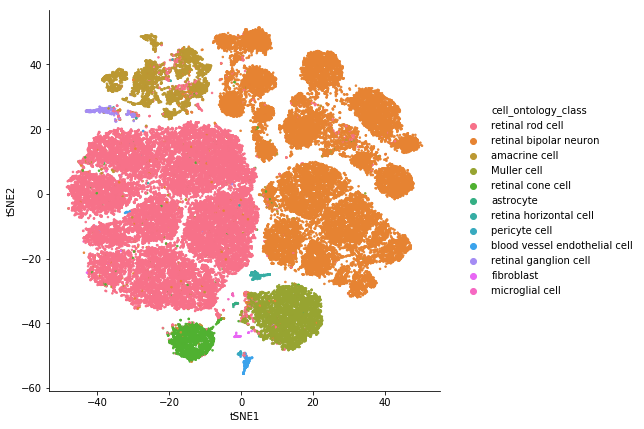

In [21]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Retina/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


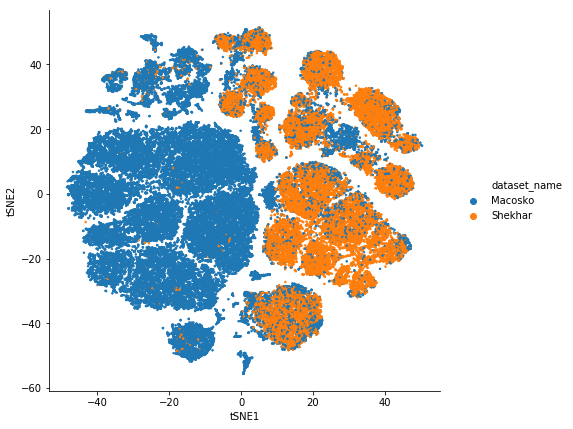

In [22]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Retina/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


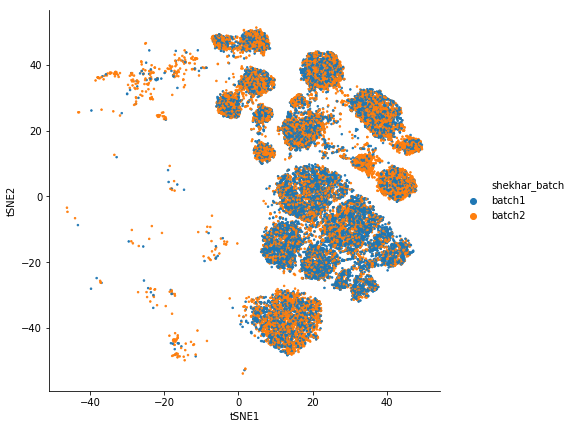

In [23]:
plot = mouse.visualize_latent("shekhar_batch")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Retina/shekhar_batch.pdf", bbox_inches="tight")

In [24]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Retina/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Retina")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Retina/model_1/checkpoint-70
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Retina/model_2/checkpoint-170
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Retina/model_3/checkpoint-152


In [25]:
with open("ALIGNED_Mus_musculus_Retina/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Retina/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [26]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Retina")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9767
Accuracy = 0.9892
